In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D


import os
import matplotlib.image as mpimg

In [ ]:

path = '/content/drive/MyDrive/archive (1)/training_set/training_set'
classes = os.listdir(path)
classes


['dogs', 'cats']

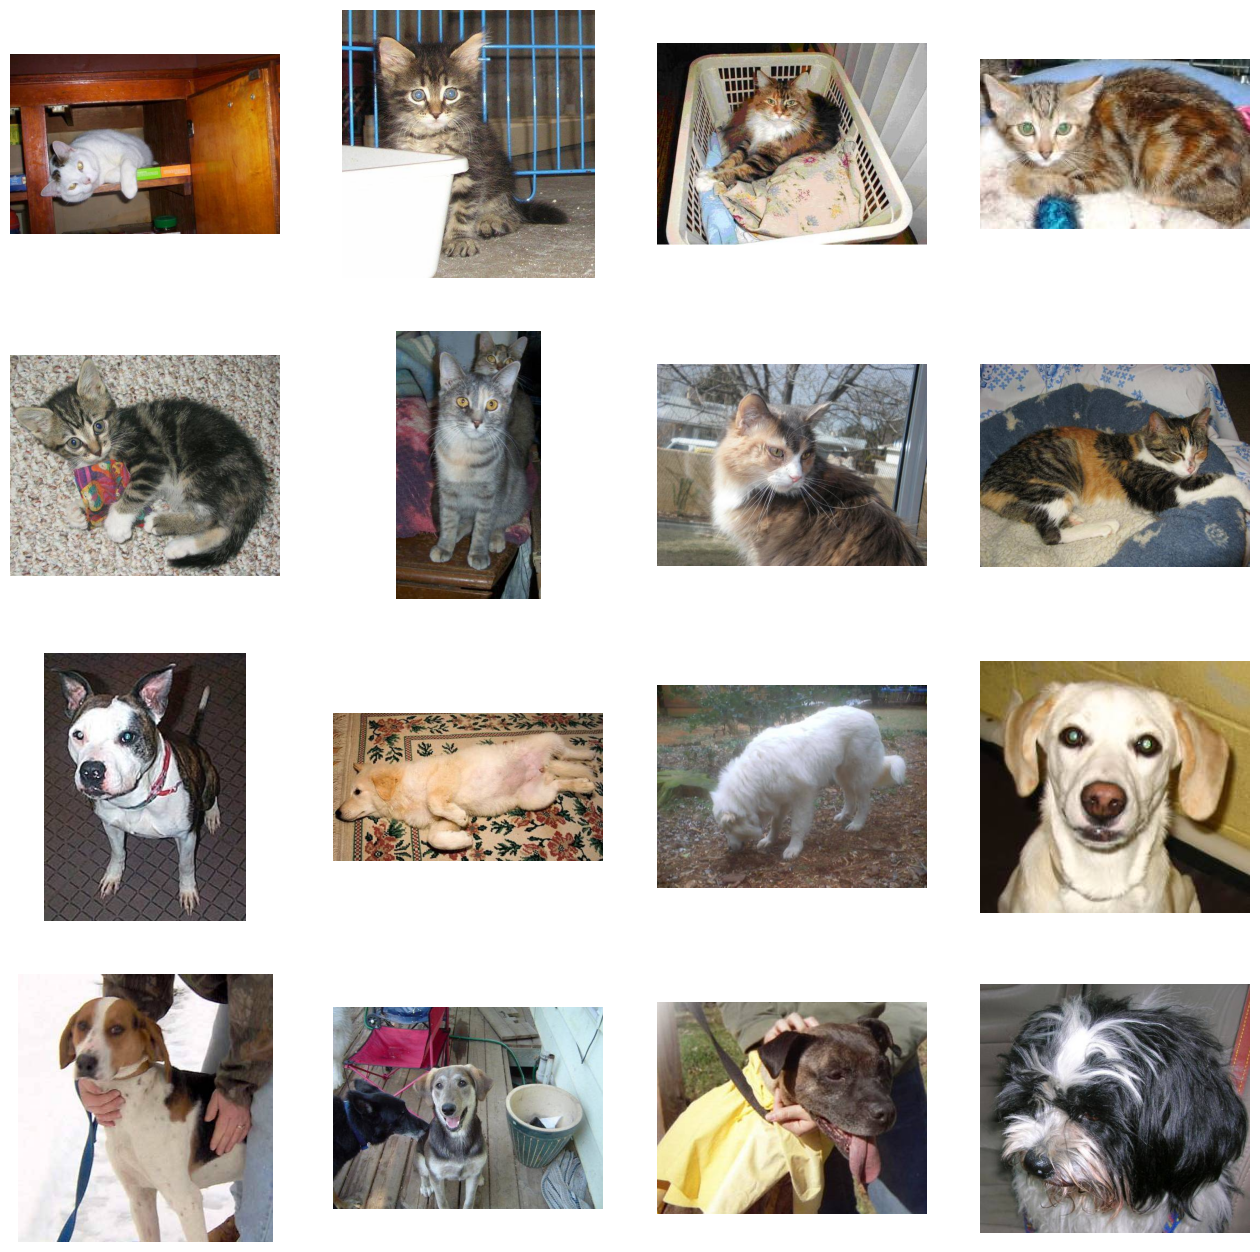

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/drive/MyDrive/archive (1)/training_set/training_set/cats')
dog_dir = os.path.join('/content/drive/MyDrive/archive (1)/training_set/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [ ]:
base_dir = '/content/drive/MyDrive/archive (1)/training_set/training_set'

# Create datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 7209 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 198, 198, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 196, 196, 64)      256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 196, 196, 64)      0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_2.h5', monitor='val_loss', save_best_only=True)

# Train the model using fit_generator with callbacks
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

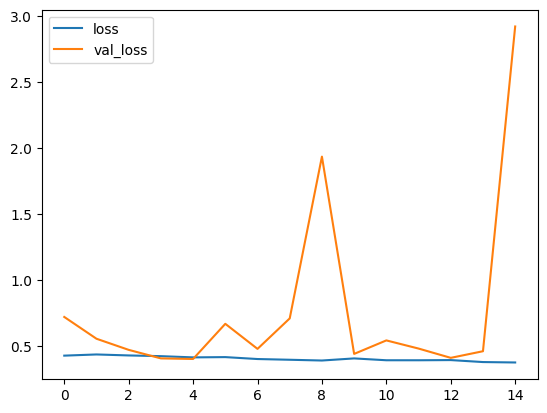

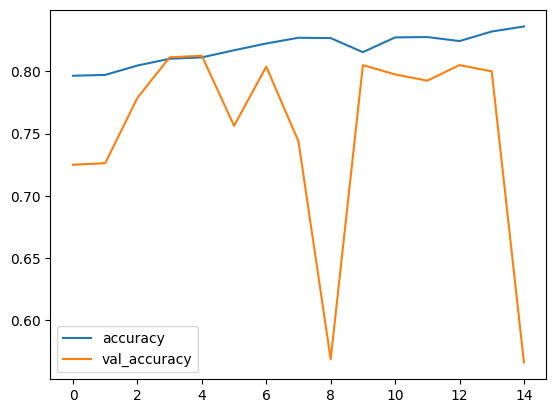

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 [==============================] - 0s 105ms/step
Dog


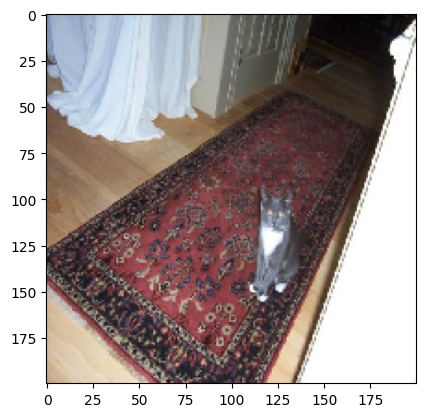

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/drive/MyDrive/test/Cats/Copy of 12476.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


In [ ]:
from tensorflow.keras.models import load_model

# Load the model with the best weights
best_model = load_model('/content/best_model.h5')

test_data_dir = '/content/drive/MyDrive/archive (1)/test_set/test_set'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

# Assuming you have a test dataset stored in the variable test_generator
test_accuracy = best_model.evaluate(test_generator)
print(f"Final Accuracy on Testing Data: {test_accuracy[1] * 100:.2f}%")



Found 2023 images belonging to 2 classes.
64/64 [==============================] - 304s 5s/step - loss: 0.4399 - accuracy: 0.7973
Final Accuracy on Testing Data: 79.73%
